# pvlib-Python Forecasting (Denver, CO)
### Install Standard Release 

In [1]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5MB 3.9MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [2]:
# Package from the Python Package Index
!pip install pvlib

# Module netCDF4 was not found 
!pip install netCDF4

# Module siphon was not found
!pip install siphon

# 4/20/2020: version 1.1.2 released. Code optimization, fix logic so only_use_cftime_datimes=False works as expected (issues #158 and #165). 
!pip install cftime==1.1.2


# Try to save Excel
!pip install openpyxl

     |████████████████████████████████| 20.4 MB 21 kB/s s eta 0:00:01
     |████████████████████████████████| 4.1 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 322 kB 27.5 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 217 kB/s eta 0:00:011
     |████████████████████████████████| 320 kB 3.4 MB/s eta 0:00:01
  Attempting uninstall: cftime
    Found existing installation: cftime 1.1.3
    Uninstalling cftime-1.1.3:
      Successfully uninstalled cftime-1.1.3


In [3]:
# Make basic imports and then set the location and time range data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import seaborn as sns; sns.set_color_codes()
import datetime

# Import pvlib forecast models
from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP
from pvlib import solarposition
from pvlib.location import Location
from matplotlib.pyplot import figure
%matplotlib inline

# Specify Location (Albuiquerque, NM)
latitude, longitude, tz = 35, -106.6, 'US/Mountain'

# Specify time range
start = pd.Timestamp(datetime.date.today(), tz=tz)
end = start + pd.Timedelta(days=5)
irrad_vars = ['ghi','dni','dhi']

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pvlib/forecast.py:19: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'The forecast module algorithms and features are highly experimental. '


In [4]:
pytz.all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [5]:
pytz.country_timezones('US')

['America/New_York',
 'America/Detroit',
 'America/Kentucky/Louisville',
 'America/Kentucky/Monticello',
 'America/Indiana/Indianapolis',
 'America/Indiana/Vincennes',
 'America/Indiana/Winamac',
 'America/Indiana/Marengo',
 'America/Indiana/Petersburg',
 'America/Indiana/Vevay',
 'America/Chicago',
 'America/Indiana/Tell_City',
 'America/Indiana/Knox',
 'America/Menominee',
 'America/North_Dakota/Center',
 'America/North_Dakota/New_Salem',
 'America/North_Dakota/Beulah',
 'America/Denver',
 'America/Boise',
 'America/Phoenix',
 'America/Los_Angeles',
 'America/Anchorage',
 'America/Juneau',
 'America/Sitka',
 'America/Metlakatla',
 'America/Yakutat',
 'America/Nome',
 'America/Adak',
 'Pacific/Honolulu']

In [6]:
# GFS model, defaults to 0.5 degree resolution
# 0.25 deg available 
model = GFS() 

# Retrive data.returns panda.DataFrame object
raw_data = model.get_data(latitude, longitude, start, end)
print(raw_data.head())

                           Total_cloud_cover_convective_cloud  \
2020-05-22 06:00:00-06:00                                 0.0   
2020-05-22 09:00:00-06:00                                 0.0   
2020-05-22 12:00:00-06:00                                 0.0   
2020-05-22 15:00:00-06:00                                 0.0   
2020-05-22 18:00:00-06:00                                 0.0   

                           Total_cloud_cover_middle_cloud_Mixed_intervals_Average  \
2020-05-22 06:00:00-06:00                                                0.0        
2020-05-22 09:00:00-06:00                                                0.0        
2020-05-22 12:00:00-06:00                                                0.0        
2020-05-22 15:00:00-06:00                                                0.0        
2020-05-22 18:00:00-06:00                                                2.0        

                           Total_cloud_cover_low_cloud_Mixed_intervals_Average  \
2020-05-22 06:00

### Process Data with pvlib

In [7]:
# Process this data before using it with pvlib
data = raw_data

# Rename the columns according the key/value pairs in model.variables.
data = model.rename(data)

# Convert temperature
data['temp_air'] = model.kelvin_to_celsius(data['temp_air'])

# Convert wind components to wind speed
data['wind_speed'] = model.uv_to_speed(data)

# Calculate irradiance estimates from cloud cover.
irrad_data = model.cloud_cover_to_irradiance(data['total_clouds'])
data = data.join(irrad_data, how='outer')

# Keep only the final data
data = data[model.output_variables]

print(data.head())

                            temp_air  wind_speed         ghi         dni  \
2020-05-22 06:00:00-06:00  11.450012    4.742235    0.018065    0.000000   
2020-05-22 09:00:00-06:00   5.514313    0.445833  520.375566  696.953201   
2020-05-22 12:00:00-06:00   3.666107    1.098943  934.863359  718.988156   
2020-05-22 15:00:00-06:00  26.149994    1.038114  851.450685  712.490079   
2020-05-22 18:00:00-06:00  38.091522    3.258642  316.248003  473.850901   

                                  dhi  total_clouds  low_clouds  mid_clouds  \
2020-05-22 06:00:00-06:00    0.018065           0.0         0.0         0.0   
2020-05-22 09:00:00-06:00  119.105935           2.0         0.0         0.0   
2020-05-22 12:00:00-06:00  259.329091           1.0         0.0         0.0   
2020-05-22 15:00:00-06:00  230.831354           2.0         0.0         0.0   
2020-05-22 18:00:00-06:00  121.673912          12.0         0.0         2.0   

                           high_clouds  
2020-05-22 06:00:00-06:00  

### GFS'S Class

In [8]:
# process_data method combines these steps in a single function
data = model.process_data(raw_data)
print(data.head())

# Implement their own process_data methods on inherited classes or implement similar stand-alone functions
# Also implement a get_processed_data() method that combines the get_data() and process_data() calls
data = model.get_processed_data(latitude, longitude, start, end)
print(data.head())

                            temp_air  wind_speed         ghi         dni  \
2020-05-22 06:00:00-06:00  11.450012    4.742235    0.018065    0.000000   
2020-05-22 09:00:00-06:00   5.514313    0.445833  520.375566  696.953201   
2020-05-22 12:00:00-06:00   3.666107    1.098943  934.863359  718.988156   
2020-05-22 15:00:00-06:00  26.149994    1.038114  851.450685  712.490079   
2020-05-22 18:00:00-06:00  38.091522    3.258642  316.248003  473.850901   

                                  dhi  total_clouds  low_clouds  mid_clouds  \
2020-05-22 06:00:00-06:00    0.018065           0.0         0.0         0.0   
2020-05-22 09:00:00-06:00  119.105935           2.0         0.0         0.0   
2020-05-22 12:00:00-06:00  259.329091           1.0         0.0         0.0   
2020-05-22 15:00:00-06:00  230.831354           2.0         0.0         0.0   
2020-05-22 18:00:00-06:00  121.673912          12.0         0.0         2.0   

                           high_clouds  
2020-05-22 06:00:00-06:00  

## Cloud Cover & Radiation

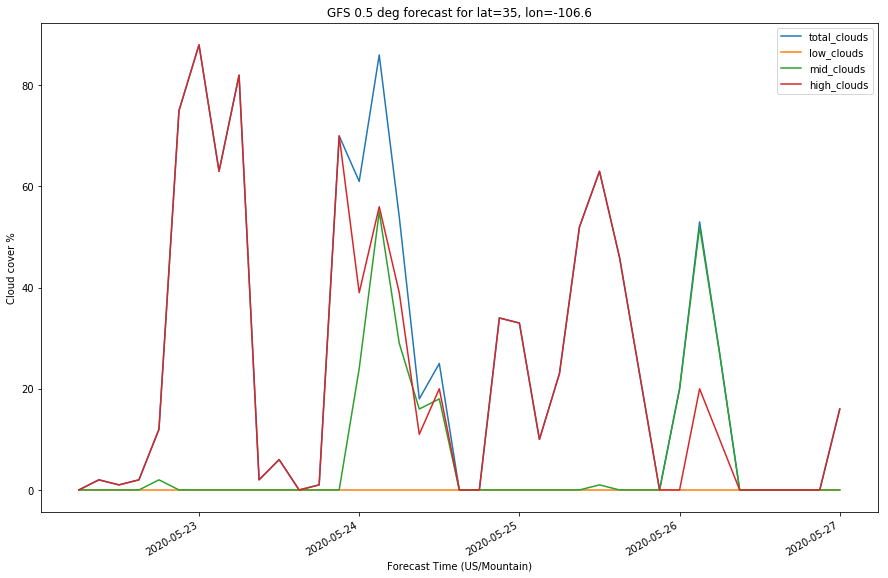

In [9]:
# Plot cloud cover percentages
cloud_vars = ['total_clouds', 'low_clouds','mid_clouds', 'high_clouds']
data[cloud_vars].plot(figsize=(15,10));
plt.ylabel('Cloud cover %');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

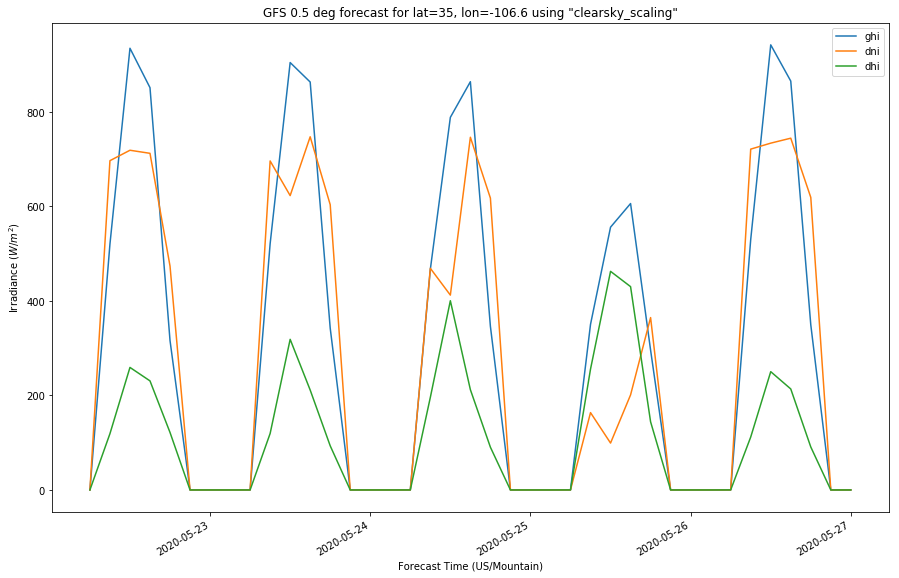

In [10]:
# Plot irradiance data
data = model.rename(raw_data)
irrads = model.cloud_cover_to_irradiance(data['total_clouds'], how='clearsky_scaling')
irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} using "clearsky_scaling"'.format(latitude, longitude));
plt.legend();

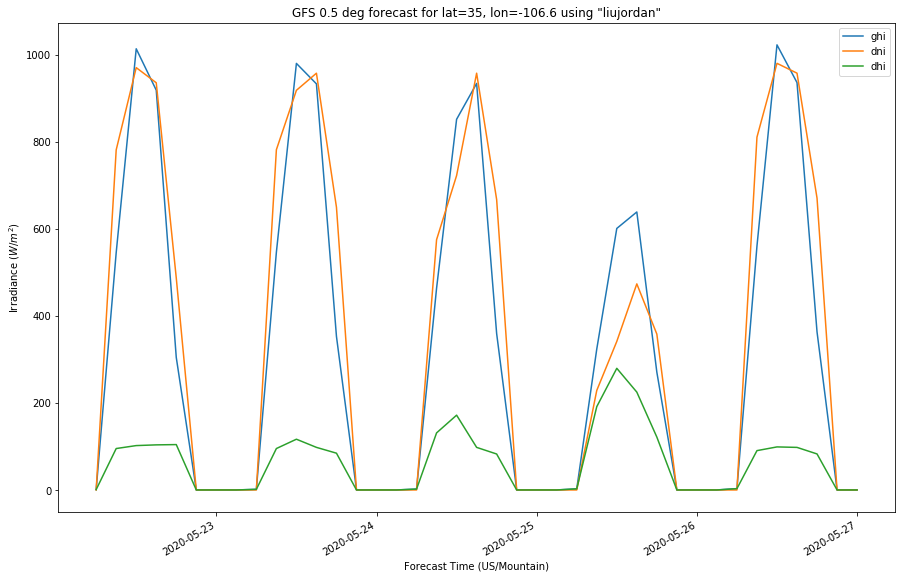

In [11]:
# Plot irradiance data
# Irradiance forecast one hour resolution as the weather data
irrads = model.cloud_cover_to_irradiance(data['total_clouds'], how='liujordan')
irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} using "liujordan"'.format(latitude, longitude));
plt.legend();

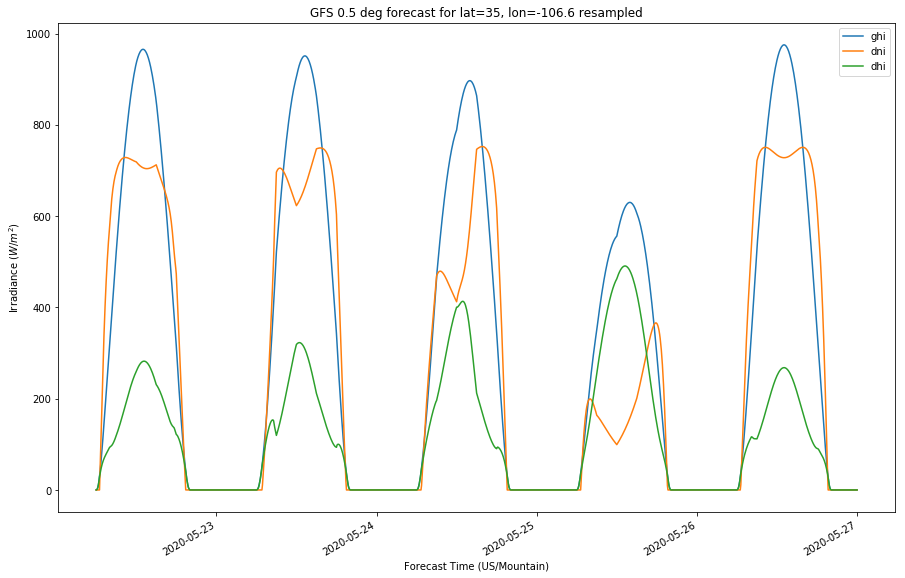

In [12]:
# Five min data resample
resampled_data = data.resample('5min').interpolate()
resampled_irrads = model.cloud_cover_to_irradiance(resampled_data['total_clouds'], how='clearsky_scaling')
resampled_irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} resampled'.format(latitude,longitude));
plt.legend();

## Weather Models
### GFS
- The Global Forecast System is the US model that provides forecast for the entire globe (6hr update)
### HRRR

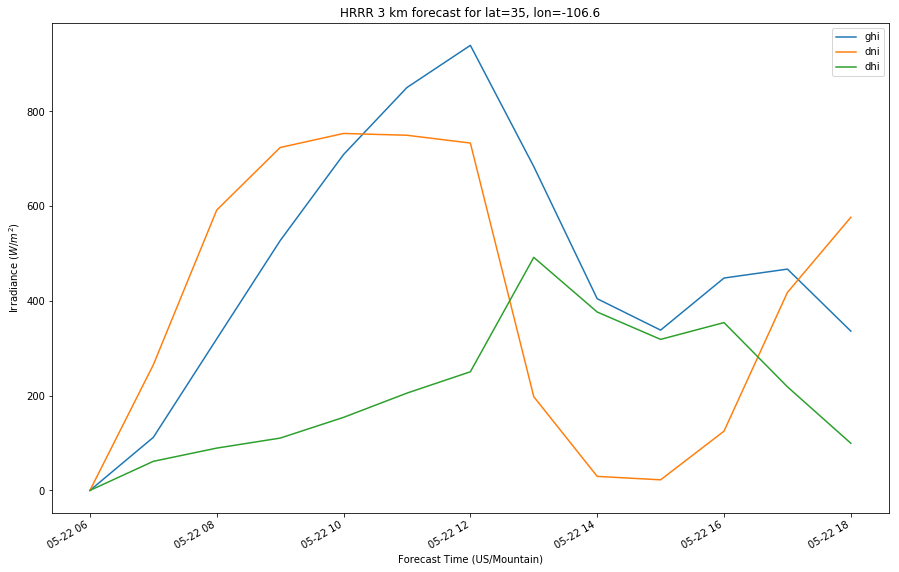

In [13]:
# High Resolution Rapid Refresh most accurate
# Only available for 15 hours
model = HRRR()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('HRRR 3 km forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

### RAP

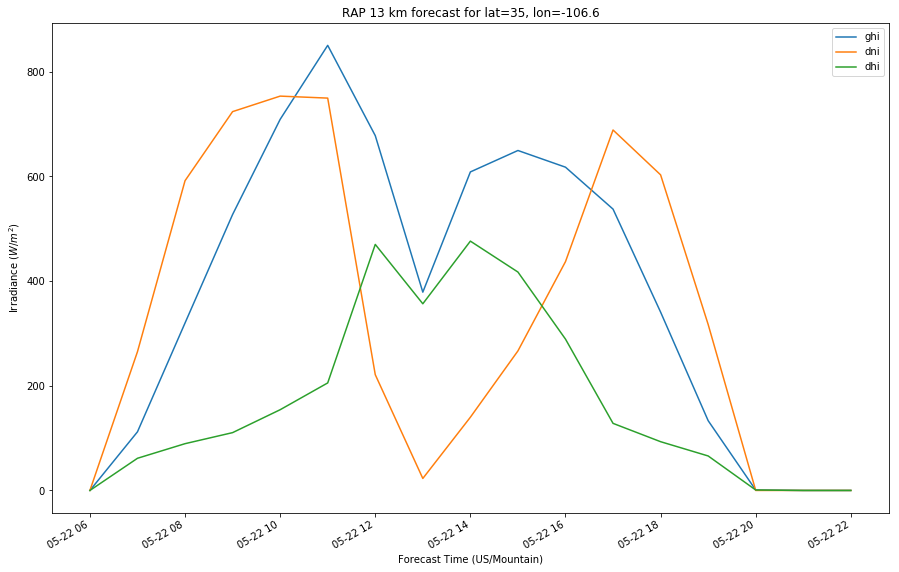

In [14]:
# The Rapid Refresh model is the parent model for the HRRR
# Updated every hour with a 20, 40 km resolution
model = RAP()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('RAP 13 km forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

### NDFD

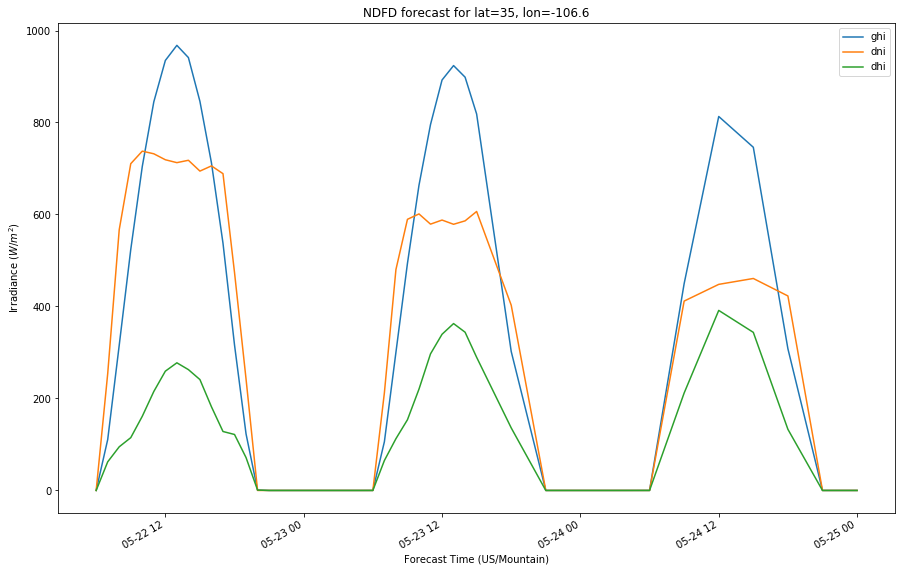

In [15]:
# The National Digital Forecast Database is not a model
# Is a collection of forecasts made by National Weather Service offices accross the country
# Updated every six hours
# Only available for the US
model = NDFD()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('NDFD forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

# PV Power Forecast

In [16]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
from pvlib.tracking import SingleAxisTracker
from pvlib.modelchain import ModelChain

sandia_modules = retrieve_sam('sandiamod')
cec_inverters = retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['SMA_America__SC630CP_US__with_ABB_EcoDry_Ultra_transformer_']
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# model a big tracker for more fun
system = SingleAxisTracker(module_parameters=module, inverter_parameters=inverter, temperature_model_parameters=temperature_model_parameters, modules_per_string=15, strings_per_inverter=300)

# fx is a common abbreviation for forecast
fx_model = GFS()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)
ac_data = fx_data.resample('5min').interpolate()

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location)

# extract relevant data for model chain
mc.run_model(ac_data)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

## ModelChain Attributes

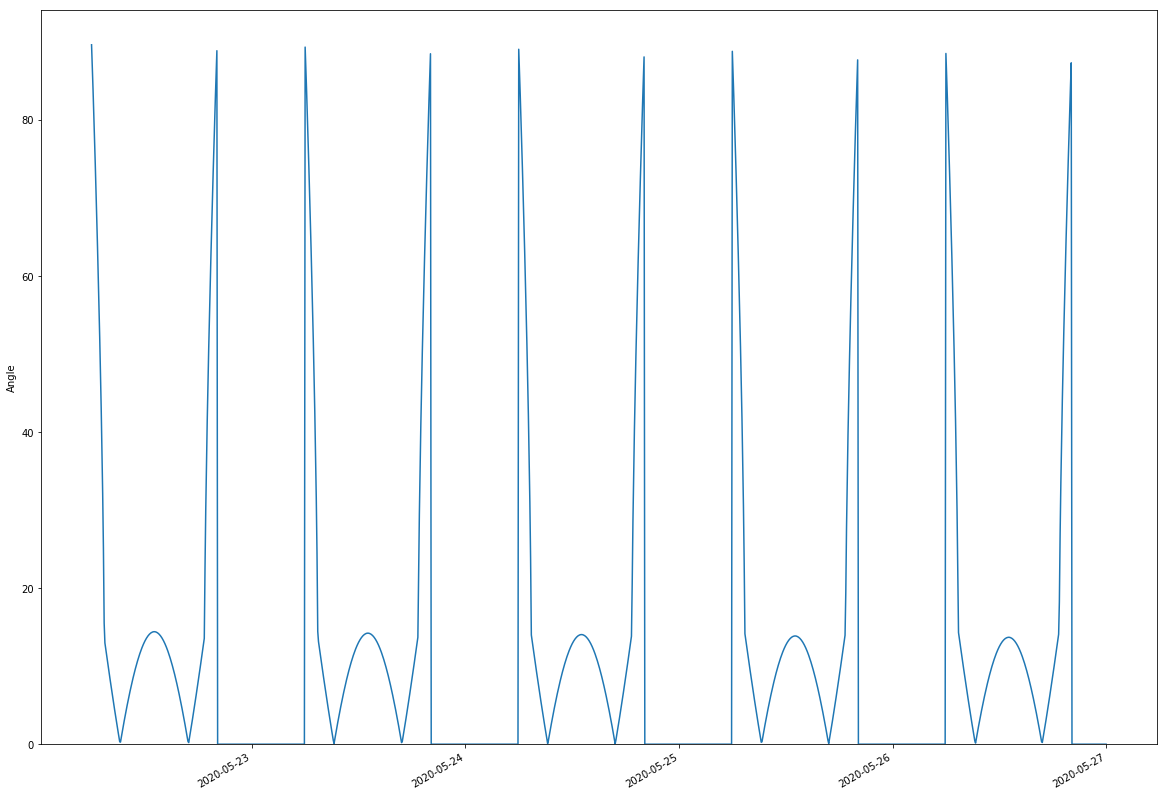

In [17]:
# ModelChain sotres modeling results on a series of attributes. 
# Angle of Incidence
mc.aoi.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('Angle');

## Modeling intermediates & Forecast power

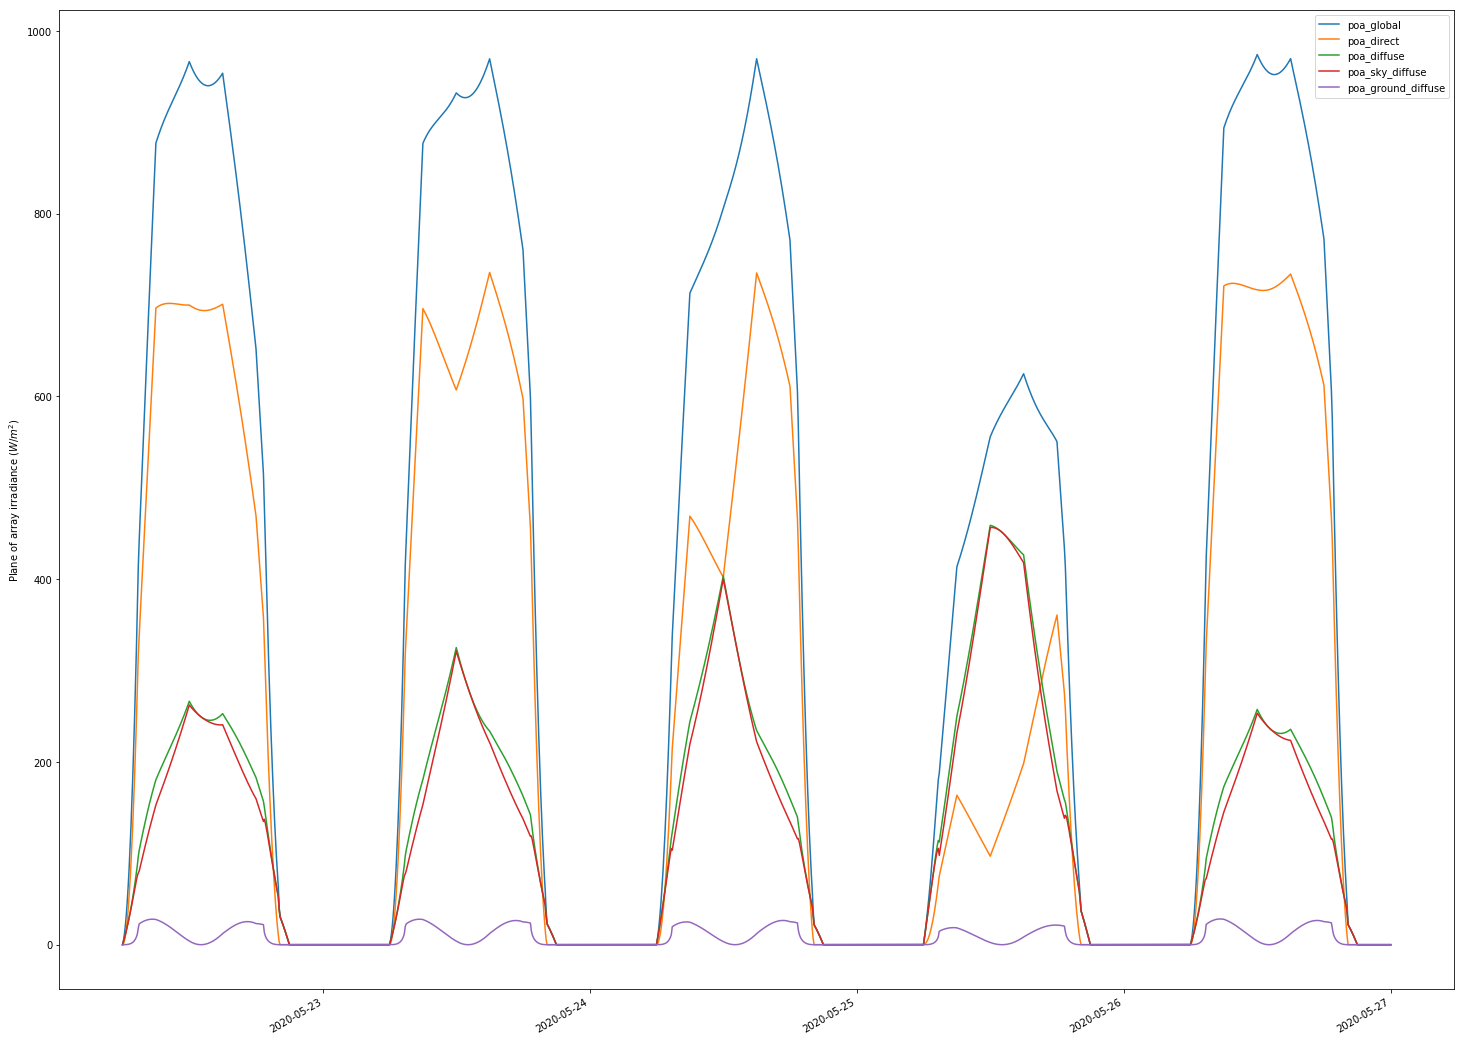

In [18]:
mc.total_irrad.plot(figsize=(25,20));
plt.ylabel('Plane of array irradiance ($W/m^2$)');
plt.legend(loc='best');

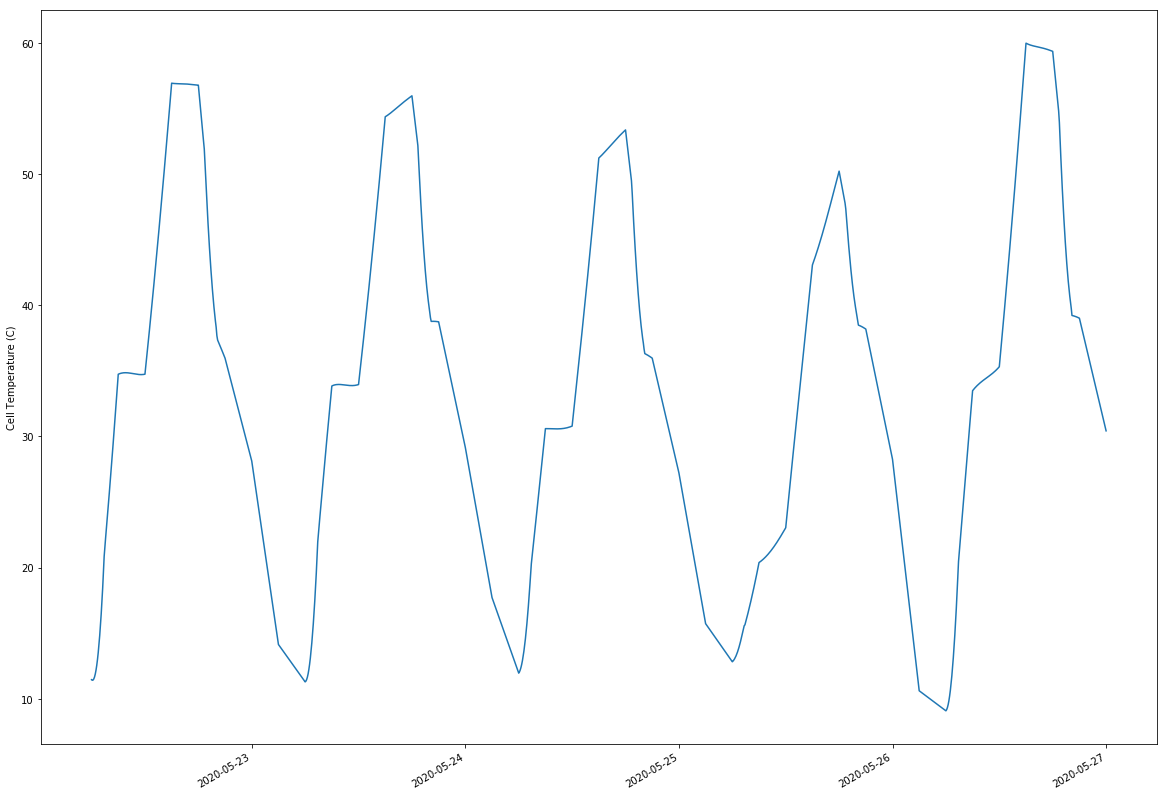

In [19]:
# Cell and module temperature
mc.cell_temperature.plot(figsize=(20,15));
plt.ylabel('Cell Temperature (C)');

## MC DC Power

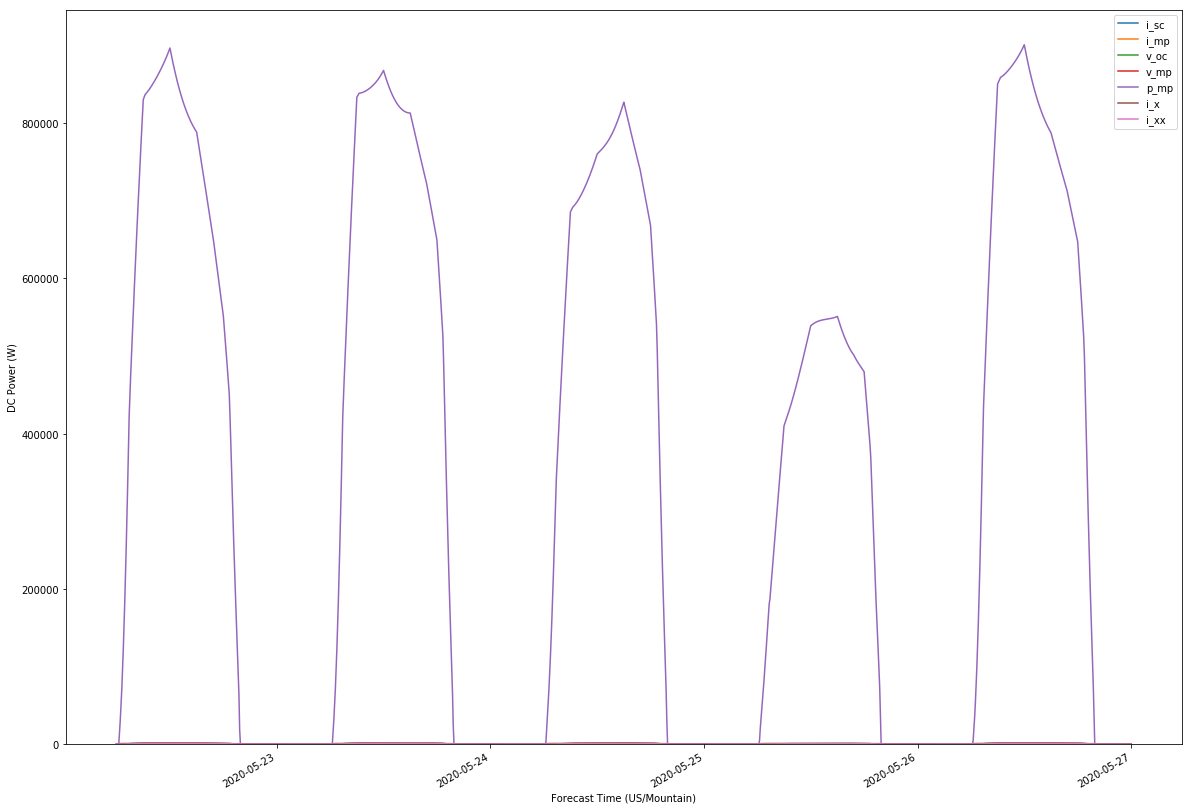

In [20]:
mc.dc.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('DC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [21]:
mc.dc.describe()

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,997.771210,890.289481,785.544095,632.258600,586133.149944,974.445443,645.980298
std,452.160297,401.460784,155.927307,131.733934,263441.475794,442.011204,281.170169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,723.433999,650.872466,776.191041,615.704189,449603.239285,705.749210,490.000724
50%,1151.117993,1027.249355,817.048265,657.510774,676800.088540,1124.075636,748.948069
75%,1393.063020,1241.801697,853.700320,692.792885,808260.186444,1361.100400,885.314075
max,1478.667759,1311.344473,864.223073,720.791525,900770.151327,1444.989054,932.415769


In [22]:
mc.dc.fillna(0)

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
2020-05-22 06:00:00-06:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-05-22 06:05:00-06:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-05-22 06:10:00-06:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-05-22 06:15:00-06:00,1.605201,1.456051,593.180793,97.141494,141.442968,1.563322,1.161148
2020-05-22 06:20:00-06:00,30.318719,27.494117,738.232179,528.093116,14519.454023,29.529707,21.875801
2020-05-22 06:25:00-06:00,57.276614,51.926325,768.925307,592.477239,30765.165487,55.789581,41.227824
2020-05-22 06:30:00-06:00,85.914061,77.865091,787.933758,627.696258,48875.626454,83.689157,61.683645
2020-05-22 06:35:00-06:00,117.848377,106.770534,802.257718,651.814163,69594.546080,114.805073,84.370702
2020-05-22 06:40:00-06:00,153.689609,139.187471,813.823041,669.683369,93211.534725,149.733324,109.678047
2020-05-22 06:45:00-06:00,193.568794,175.225277,823.404486,683.312440,119733.611707,188.603559,137.643649


In [23]:
mc.dc.fillna(0).to_csv('5 min DC 3rd ABQ.csv', encoding='utf-8')

## MC AC Power

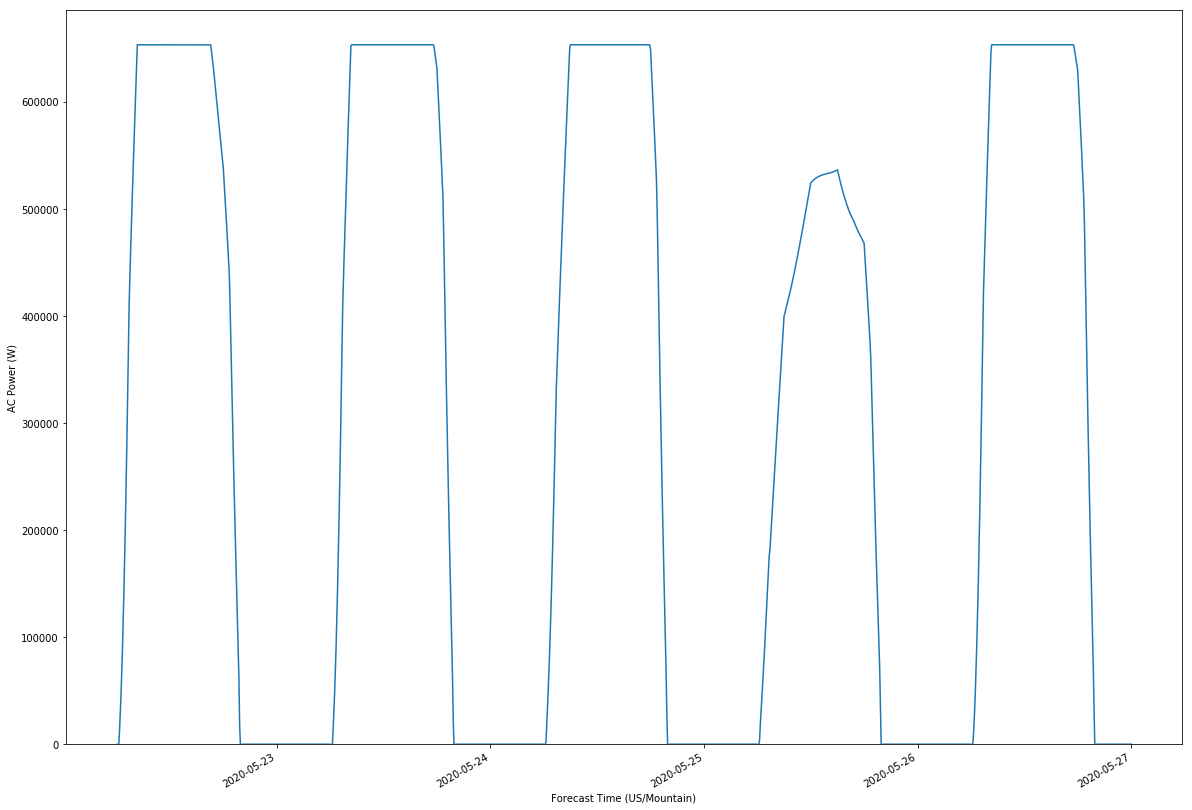

In [24]:
# AC Power
mc.ac.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('AC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [25]:
mc.ac.describe()

count       850.000000
mean     508378.886191
std      205676.257508
min        -195.900000
25%      437780.985332
50%      653000.000000
75%      653000.000000
max      653000.000000
dtype: float64

In [26]:
mc.ac.fillna(0)

2020-05-22 06:00:00-06:00      -195.900000
2020-05-22 06:05:00-06:00      -195.900000
2020-05-22 06:10:00-06:00      -195.900000
2020-05-22 06:15:00-06:00      -195.900000
2020-05-22 06:20:00-06:00     12261.233917
2020-05-22 06:25:00-06:00     28079.427054
2020-05-22 06:30:00-06:00     45862.932630
2020-05-22 06:35:00-06:00     66258.891838
2020-05-22 06:40:00-06:00     89521.970788
2020-05-22 06:45:00-06:00    115638.281354
2020-05-22 06:50:00-06:00    144479.368765
2020-05-22 06:55:00-06:00    175902.721716
2020-05-22 07:00:00-06:00    209802.768808
2020-05-22 07:05:00-06:00    246118.131986
2020-05-22 07:10:00-06:00    284791.504382
2020-05-22 07:15:00-06:00    325662.066830
2020-05-22 07:20:00-06:00    368239.072676
2020-05-22 07:25:00-06:00    411495.880691
2020-05-22 07:30:00-06:00    438521.343334
2020-05-22 07:35:00-06:00    461633.803264
2020-05-22 07:40:00-06:00    484384.197373
2020-05-22 07:45:00-06:00    506772.353906
2020-05-22 07:50:00-06:00    528799.687631
2020-05-22 

In [27]:
mc.ac.fillna(0).to_csv('5 min AC 3rd ABQ.csv', encoding='utf-8')

In [28]:
resampled_irrads

,ghi,dni,dhi
2020-05-22 06:00:00-06:00,0.018065,0.000000,0.018065
2020-05-22 06:05:00-06:00,0.476600,0.000000,0.476600
2020-05-22 06:10:00-06:00,2.126091,0.000000,2.126091
2020-05-22 06:15:00-06:00,5.680334,0.000000,5.680334
2020-05-22 06:20:00-06:00,11.430785,0.000000,11.430785
2020-05-22 06:25:00-06:00,19.297642,0.000000,19.297642
2020-05-22 06:30:00-06:00,29.021068,0.000000,29.021068
2020-05-22 06:35:00-06:00,40.298039,42.819081,35.704979
2020-05-22 06:40:00-06:00,52.846470,86.716072,42.102059
2020-05-22 06:45:00-06:00,66.426132,131.399029,47.954497


In [29]:
resampled_irrads.to_csv('5 min Irrad 3rd ABQ.csv', encoding='utf-8')